In [3]:
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [7]:
Base.classes.keys()

['measurements', 'stations']

In [9]:
Measurement = Base.classes.measurements
Station = Base.classes.stations

In [10]:
session = Session(engine)

In [11]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1a5214e57f0>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0}

In [12]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1a52146ad68>,
 'elevation': 3.0,
 'id': 1,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

<IPython.core.display.Javascript object>


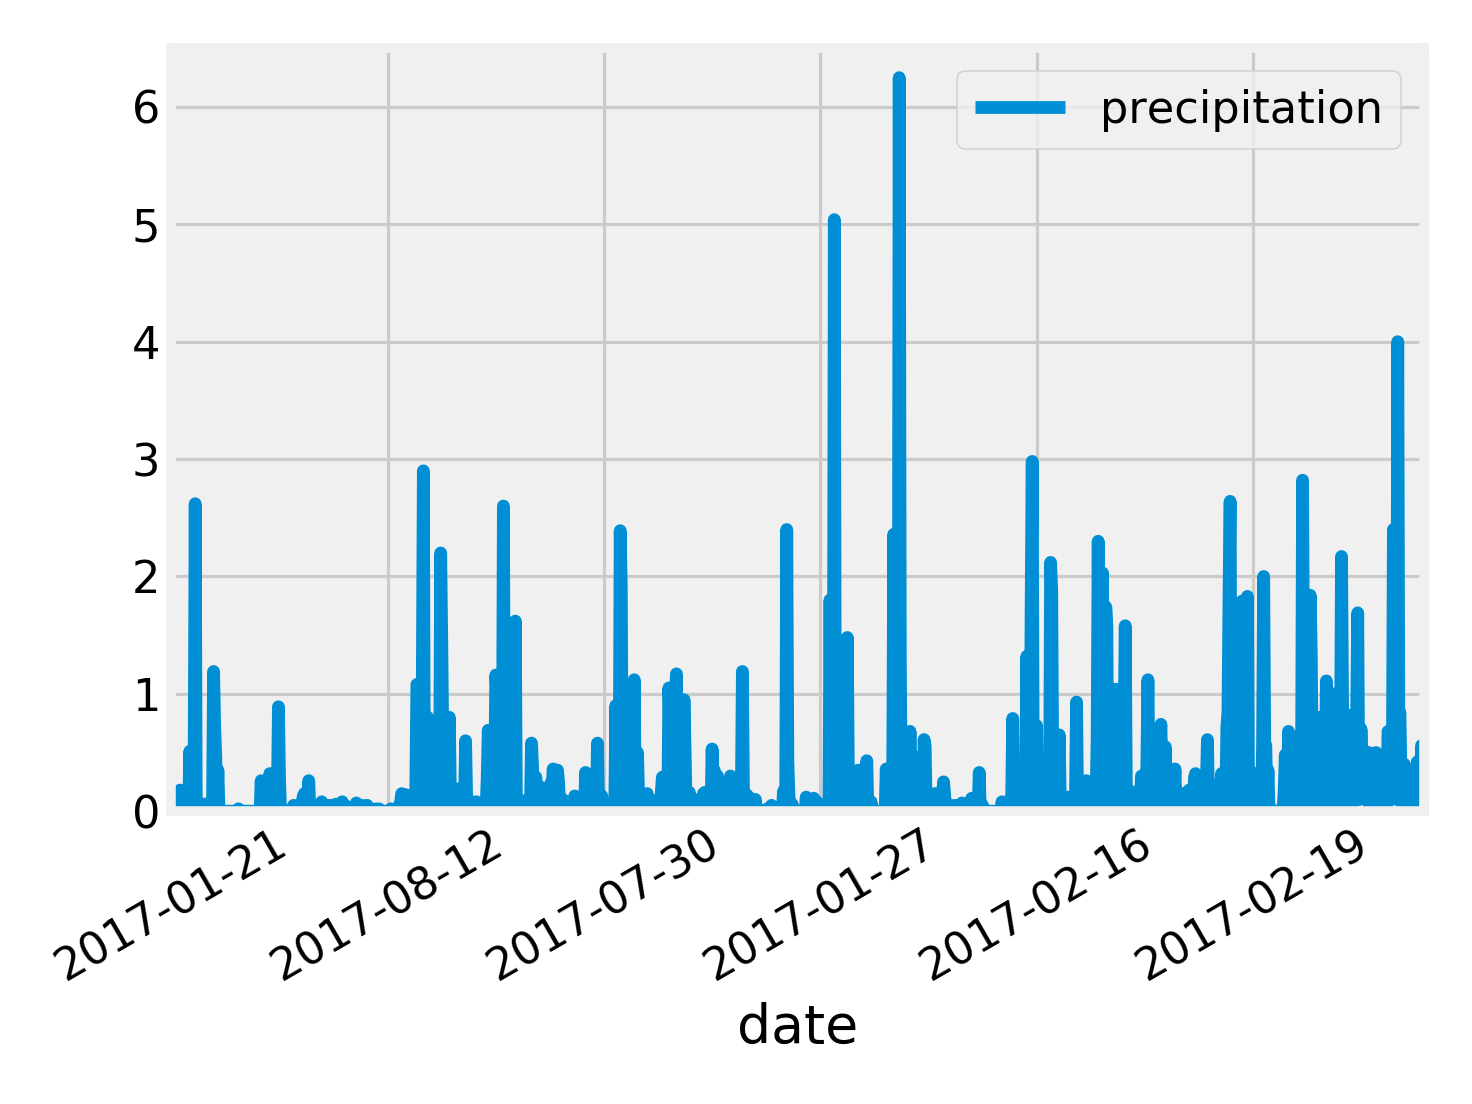

In [15]:
mn = dt.date.today() - dt.timedelta(days=365)
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= mn).all()

precipitation_df = pd.DataFrame(precipitation, columns=['date', 'precipitation'])
precipitation_df.set_index(precipitation_df['date'], inplace=True)

precipitation_df.plot(x_compat=True)
plt.xticks(rotation='30')
plt.ylim(0,6.5)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


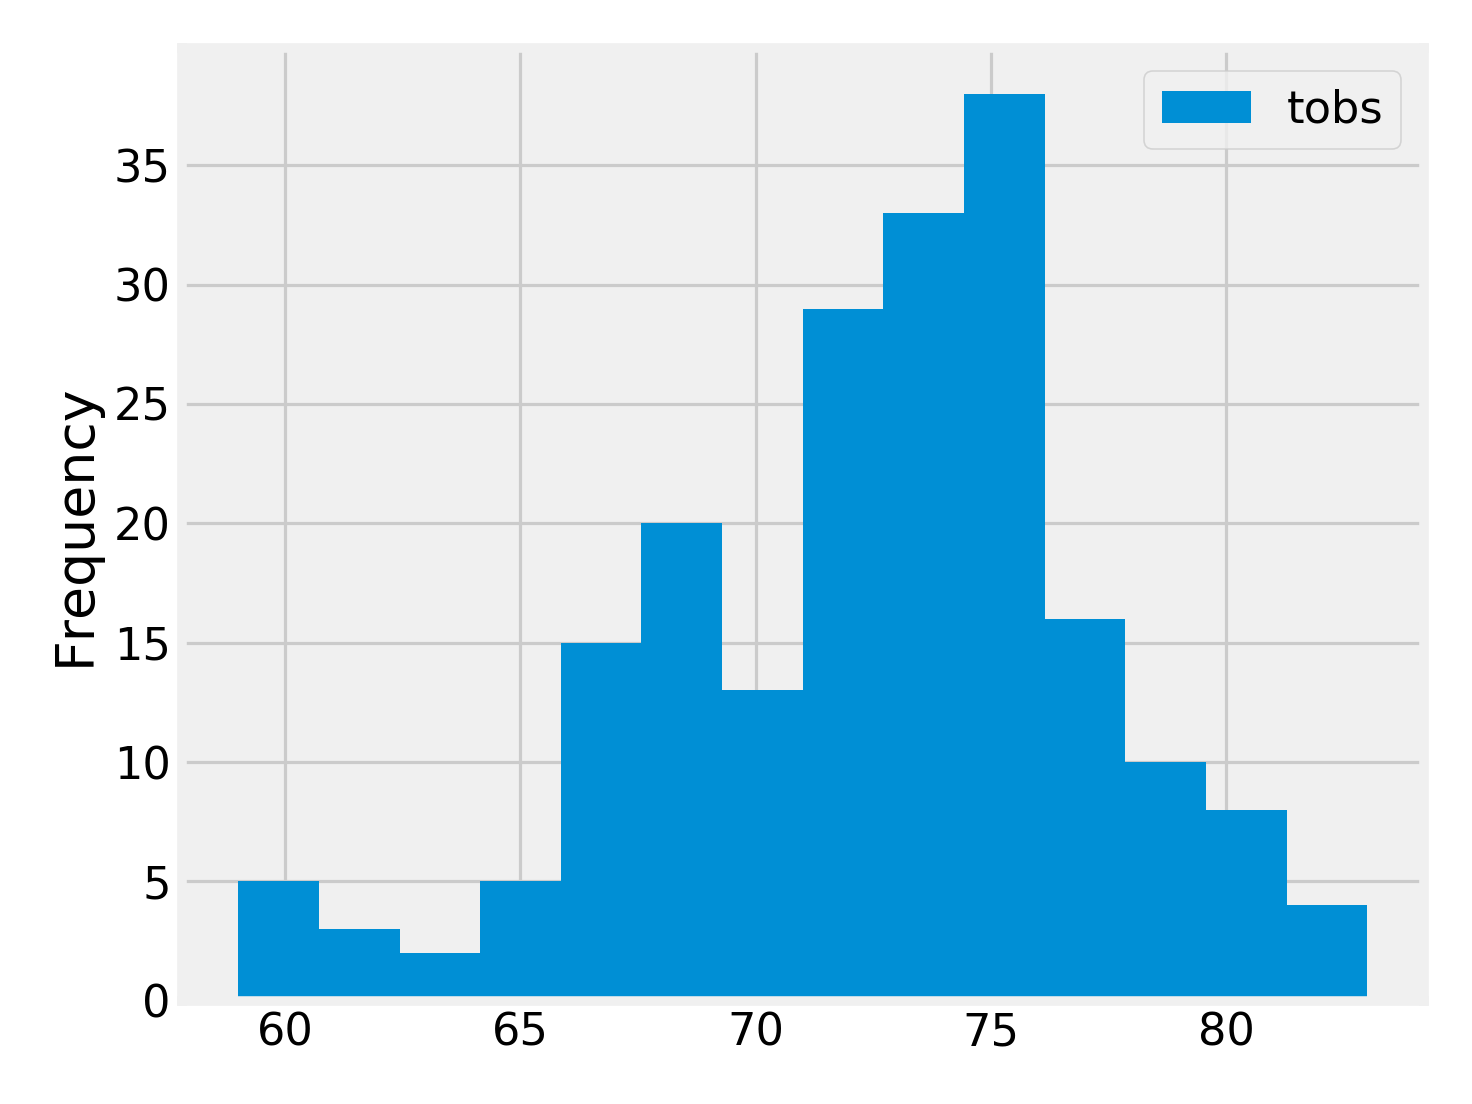

In [17]:
station_cnt=session.query(func.count(Station.station)).all()
station_cnt=session.query(Measurement.station, func.count(Measurement.station))
grp_station_cnt=station_cnt.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
highest_station=grp_station_cnt[0]

observations=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))
max_station_observation=observations.filter(Measurement.station ==highest_station[0]).all()

tobs = session.query(Measurement.tobs).filter(Measurement.date >= mn,Measurement.station==highest_station[0]).all()
tobs_df=pd.DataFrame(tobs, columns=['tobs'])

tobs_df.plot.hist(bins=14)
plt.tight_layout()
plt.show()

In [18]:
def calc_temps(start_date,end_date):
    x=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))
    x.filter(Measurement.date >= start_date).filter(Measurement.date <= end_date)
    return x.all()

<IPython.core.display.Javascript object>


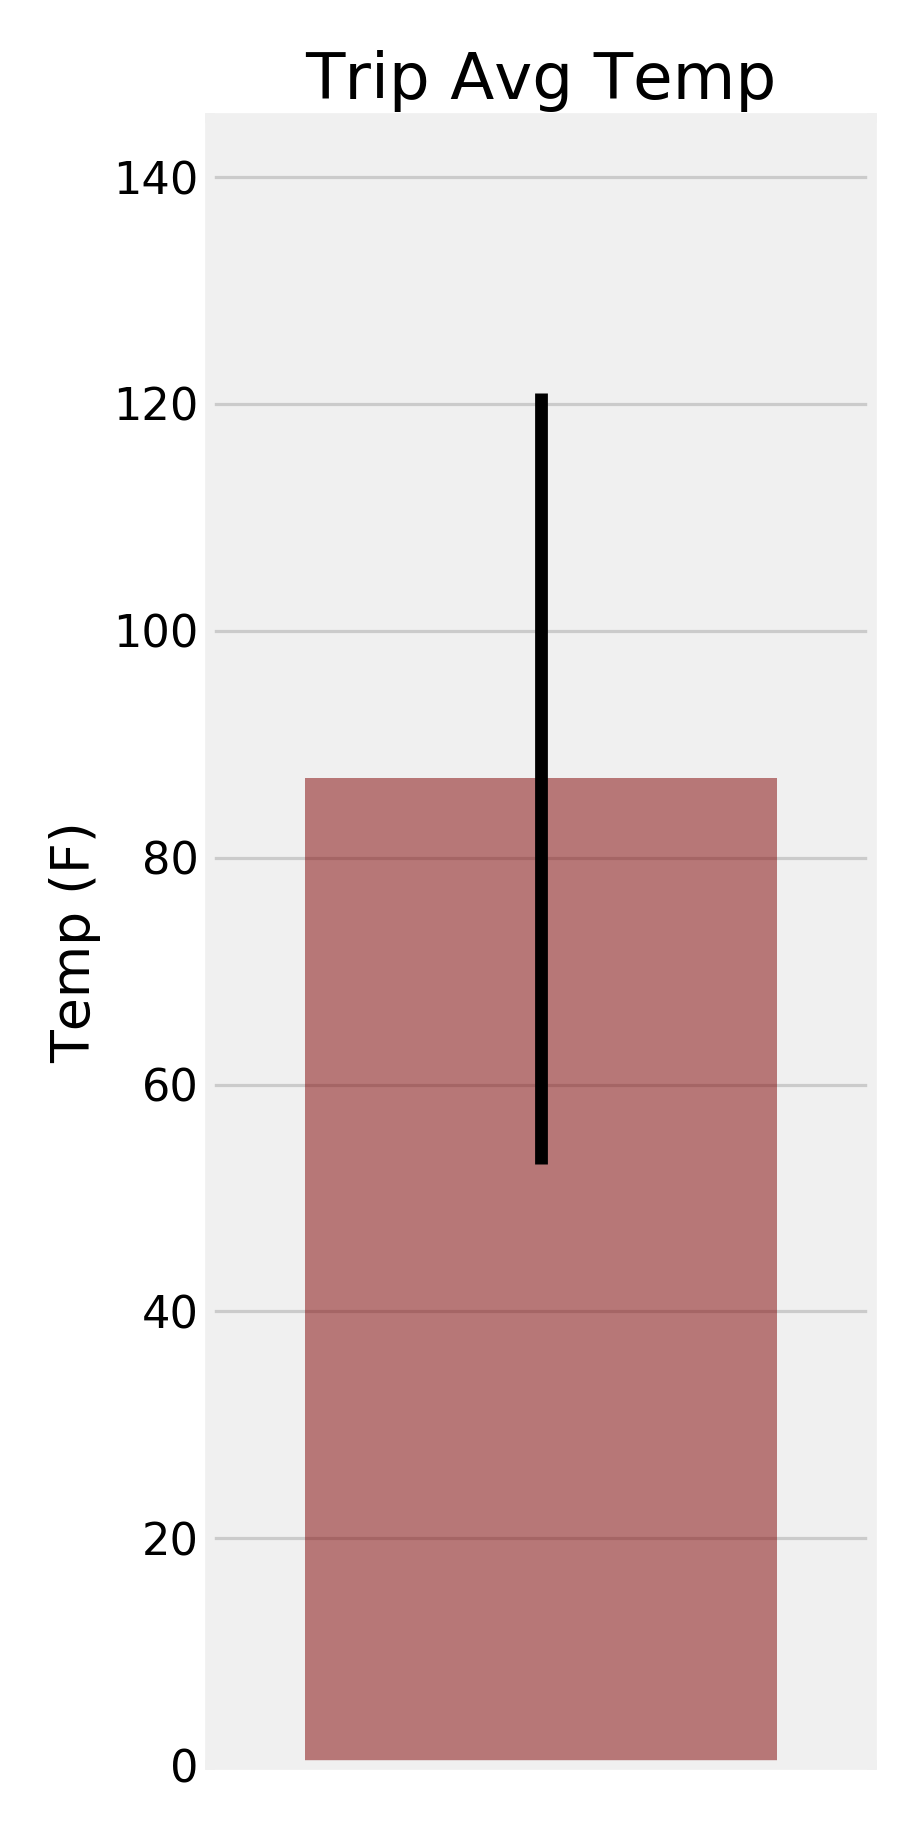

In [21]:
t_min, t_max, t_avg =calc_temps('2017-01-01', '2018-01-01')[0]
yerr=t_max-t_min

fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
bar = ax.bar(xpos, t_max, yerr=yerr, alpha=0.5, color='maroon', align="center")
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Avg Temp", ylabel="Temp (F)")
ax.margins(.2, .2)
# fig.autofmt_xdate()
fig.tight_layout()
fig.show()